In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [3]:
x,y = datasets.make_circles(n_samples = 2000,factor=.5,noise=.05)

In [4]:
x

array([[ 0.98498498, -0.01329574],
       [ 0.15983662,  0.45948834],
       [-0.42136161,  0.19547679],
       ...,
       [ 0.51598648,  0.05867679],
       [ 0.94400938,  0.41434675],
       [-0.19806766,  0.9431006 ]])

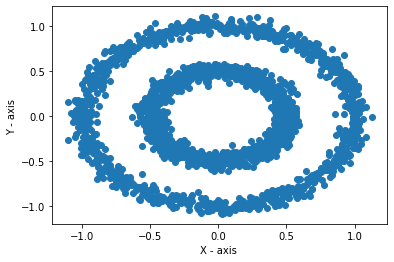

In [5]:
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel("X - axis ")
plt.ylabel("Y - axis ")
plt.show()

In [6]:
db = DBSCAN(eps=0.2, min_samples=3).fit(x)

In [7]:
def dbscan_predict(model, X):

    samples = X.shape[0]

    y_pred = np.ones(shape=samples, dtype=int) * -1

    for i in range(samples):
        diff = model.components_ - X[i, :]  
        distance = np.linalg.norm(diff, axis=1)  
        shortest_dist_idx = np.argmin(distance)
        if distance[shortest_dist_idx] < model.eps:
            y_pred[i] = model.labels_[model.core_sample_indices_[shortest_dist_idx]]

    return y_pred

In [8]:
y_pred = dbscan_predict(db,x)

Text(0, 0.5, 'Y - axis ')

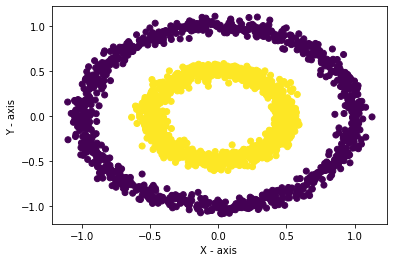

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap="viridis")
plt.xlabel("X - axis ")
plt.ylabel("Y - axis ")